=== Chi-Square Scores per Feature ===
contact        : 90.83
housing        : 20.45
loan           : 19.51
month          : 15.50
poutcome       : 11.16
job            : 7.41
education      : 5.41
marital        : 0.50
default        : 0.03


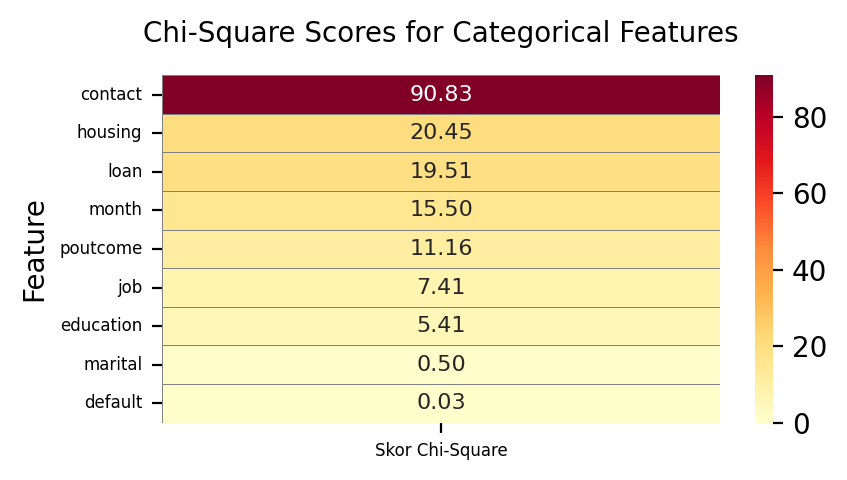

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("bank_cleaned.csv")

df['y'] = df['y'].map({'yes': 1, 'no': 0})

label_enc = LabelEncoder()
df['job_enc'] = label_enc.fit_transform(df['job'])
df['marital_enc'] = label_enc.fit_transform(df['marital'])
df['education_enc'] = label_enc.fit_transform(df['education'])
df['default_enc'] = label_enc.fit_transform(df['default'])
df['housing_enc'] = label_enc.fit_transform(df['housing'])
df['loan_enc'] = label_enc.fit_transform(df['loan'])
df['contact_enc'] = label_enc.fit_transform(df['contact'])
df['month_enc'] = label_enc.fit_transform(df['month'])
df['poutcome_enc'] = label_enc.fit_transform(df['poutcome'])

X_cat = df[['job_enc', 'marital_enc', 'education_enc', 'default_enc',
            'housing_enc', 'loan_enc', 'contact_enc', 'month_enc', 'poutcome_enc']]
y = df['y']
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X_cat, y)
scores = selector.scores_

feature_names = ['job', 'marital', 'education', 'default', 'housing',
                 'loan', 'contact', 'month', 'poutcome']
score_df = pd.DataFrame({
    'Feature': feature_names,
    'Skor Chi-Square': scores
}).set_index('Feature')

score_df = score_df.sort_values(by='Skor Chi-Square', ascending=False)

print("=== Chi-Square Scores per Feature ===")
for col, score in score_df.itertuples():
    print(f"{col:<15}: {score:.2f}")

plt.figure(figsize=(4.5, 2.5), dpi=200)
sns.heatmap(
    score_df,
    annot=True,
    cmap='YlOrRd',
    fmt=".2f",
    linewidths=0.3,
    linecolor='gray',
    annot_kws={'size': 8},
    vmin=0,
    vmax=score_df['Skor Chi-Square'].max()  # auto scale maksimal
)
plt.title("Chi-Square Scores for Categorical Features", fontsize=10, pad=12)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()
